# *`Overview`*

- Nama : Airlangga Bayu Taqwa
- NRP : 5026221204
- Kelas : PBA A Gasal 2025
- Dosen Pengampu : Dr. Ir. Aris Tjahyanto, M.Kom.

---

## ***Definisi***

  Eksplorasi Analisis Sentimen Ulasan Pengguna Aplikasi Investasi Ajaib Menggunakan Algoritma Machine Learning

## ***Tujuan***

  Tugas ini bertujuan untuk membangun, mengevaluasi, dan meningkatkan model klasifikasi sentimen guna mengidentifikasi pandangan (positif, negatif, atau netral) pengguna terhadap layanan dan fitur yang disediakan oleh Aplikasi Investasi Ajaib, berdasarkan ulasan yang dikumpulkan dari platform publik.

# *Scrapping Data*

In [1]:
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.3 MB/s eta 0:00:00


In [2]:
from google_play_scraper import app, reviews
import pandas as pd
import datetime

In [6]:
from google_play_scraper import reviews, Sort

app_id = 'ajaib.co.id'

def get_reviews(
    app_id,
    lang='id',
    country='id',
    sort=Sort.NEWEST,
    count=2000,
    continuation_token=None
    ):
    try:
      result, continuation_token = reviews(
        app_id,
        lang=lang,
        country=country,
        sort=sort,
        count=count,
        continuation_token=continuation_token
      )

      return result, continuation_token
    except Exception as e:
      print(e)
      return None, None

reviews, continuation_token = get_reviews(app_id)

if reviews is not None:
  print("Jumlah ulasan:", len(reviews))
  if len(reviews) > 0:
    print("Contoh ulasan:")
    print(reviews[0])

else:
  print("Tidak ada ulasan ditemukan.")

Jumlah ulasan: 2000
Contoh ulasan:
{'reviewId': '419d8711-7e9f-40de-b040-eae3c501c619', 'userName': 'Ruuhul Maani', 'userImage': 'https://play-lh.googleusercontent.com/a/ACg8ocIB22kDPDvHESrE45nuMnRzCUiYDE3_iWhFoUTStM08OSmeTw=mo', 'content': 'sering gangguan, banyak bug, sudah pasang stop loss malah gk kejual saham saya.', 'score': 1, 'thumbsUpCount': 0, 'reviewCreatedVersion': '2.81.0', 'at': datetime.datetime(2025, 11, 3, 8, 44, 9), 'replyContent': 'Hai kak, Mengenai kendala kakak, mohon dipastikan telah menggunakan jaringan internet yang stabil dan menggunakan aplikasi versi terbaru. Namun jika kakak masih mengalami kendala, mohon menghubungi kami melalui email kami di support.saham@ajaib.co.id ya kak ~ Rid', 'repliedAt': datetime.datetime(2025, 11, 3, 9, 2, 39), 'appVersion': '2.81.0'}


In [7]:
import csv

if reviews is not None and len(reviews) > 0:
  reviews_df = pd.DataFrame(reviews)
  # Select and rename columns
  reviews_df = reviews_df[['reviewId', 'userName', 'score', 'content', 'at']]
  reviews_df = reviews_df.rename(columns={
      'reviewId': 'Review ID',
      'userName': 'Username',
      'score': 'Rating',
      'content': 'Review Text',
      'at': 'Date'
  })
  reviews_df.to_csv('hasil_scraper_ulasan_app_ajaib.csv', index=False)
  print("Reviews saved to hasil_scraper_ulasan_app_ajaib.csv")
  display(reviews_df.head())
else:
  print("No reviews to save.")

Reviews saved to hasil_scraper_ulasan_app_ajaib.csv


,Review ID,Username,Rating,Review Text,Date
0,419d8711-7e9f-40de-b040-eae3c501c619,Ruuhul Maani,1,"sering gangguan, banyak bug, sudah pasang stop...",2025-11-03 08:44:09
1,2655d5dc-5845-4ce5-9029-1796d2d80043,Nur Bay,5,min tolong adain fitur trailing stop 🙏,2025-11-03 08:08:00
2,274773a3-f73d-4412-8a05-b8156f2c20eb,Syeikhul Mujib,1,proses deposit & penarikannya terlalu lamaaaa,2025-11-03 07:29:10
3,45c5c798-ac8c-4493-8e8e-50d144b4fd0c,Ahmad badawi Encep,1,sial banget aku order s&p.. padahal pake marke...,2025-11-02 23:15:17
4,8d565b3d-62ee-4aa4-96bc-6050d21ef864,Dendi Hendarmin,3,lama ya verifikasinya padahal udah sy setor 10...,2025-11-02 23:08:11


# *Preprocessing Data*

In [10]:
import pandas as pd

data = pd.read_csv('hasil_scraper_ulasan_app_ajaib.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review ID    2000 non-null   object
 1   Username     2000 non-null   object
 2   Rating       2000 non-null   int64 
 3   Review Text  2000 non-null   object
 4   Date         2000 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.3+ KB


In [14]:
df = pd.DataFrame(data[['Date','Username','Rating','Review Text']])
df.head(5)

,Date,Username,Rating,Review Text
0,2025-11-03 08:44:09,Ruuhul Maani,1,"sering gangguan, banyak bug, sudah pasang stop..."
1,2025-11-03 08:08:00,Nur Bay,5,min tolong adain fitur trailing stop 🙏
2,2025-11-03 07:29:10,Syeikhul Mujib,1,proses deposit & penarikannya terlalu lamaaaa
3,2025-11-02 23:15:17,Ahmad badawi Encep,1,sial banget aku order s&p.. padahal pake marke...
4,2025-11-02 23:08:11,Dendi Hendarmin,3,lama ya verifikasinya padahal udah sy setor 10...


## ***Hapus Data Duplikat***
---

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         2000 non-null   object
 1   Username     2000 non-null   object
 2   Rating       2000 non-null   int64 
 3   Review Text  2000 non-null   object
dtypes: int64(1), object(3)
memory usage: 62.6+ KB


In [16]:
df.drop_duplicates(subset = "Review Text", keep = 'first', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1898 entries, 0 to 1998
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         1898 non-null   object
 1   Username     1898 non-null   object
 2   Rating       1898 non-null   int64 
 3   Review Text  1898 non-null   object
dtypes: int64(1), object(3)
memory usage: 74.1+ KB


## ***Data Cleaning***
---

In [17]:
import re

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove symbols and numbers, keep letters and spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase (case folding)
    text = text.lower()
    return text


df['Cleaned Review Text'] = df['Review Text'].apply(clean_text)

In [18]:
df.head(10)

,Date,Username,Rating,Review Text,Cleaned Review Text
0,2025-11-03 08:44:09,Ruuhul Maani,1,"sering gangguan, banyak bug, sudah pasang stop...",sering gangguan banyak bug sudah pasang stop l...
1,2025-11-03 08:08:00,Nur Bay,5,min tolong adain fitur trailing stop 🙏,min tolong adain fitur trailing stop
2,2025-11-03 07:29:10,Syeikhul Mujib,1,proses deposit & penarikannya terlalu lamaaaa,proses deposit penarikannya terlalu lamaaaa
3,2025-11-02 23:15:17,Ahmad badawi Encep,1,sial banget aku order s&p.. padahal pake marke...,sial banget aku order sp padahal pake market o...
4,2025-11-02 23:08:11,Dendi Hendarmin,3,lama ya verifikasinya padahal udah sy setor 10...,lama ya verifikasinya padahal udah sy setor rb...
5,2025-11-02 21:23:43,ili suhili,1,belum terverifikasi dh nunggu 7 Minggu,belum terverifikasi dh nunggu minggu
6,2025-11-02 16:09:58,Kaka Im,1,maaf banget .awalnya saya mau pake sekutitas a...,maaf banget awalnya saya mau pake sekutitas aj...
7,2025-11-02 10:56:13,Wijayanti Dwi,5,"Tampilan ui aplikasi nyaman dipandang,dan bany...",tampilan ui aplikasi nyaman dipandangdan banya...
8,2025-11-02 07:30:39,Tamora,5,simpel,simpel
9,2025-11-02 02:45:09,Muhammad Iqbal,3,"saya kurangin bintang nya, karena customer ser...",saya kurangin bintang nya karena customer serv...


## ***Normalized Data***
Merevisi kata yang tidak baku menjadi baku

> sy -> saya

---

In [19]:
import pandas as pd

def normalize_word(text, formal_word_dict):
    words = text.split()
    normalized_words = [formal_word_dict.get(word, word) for word in words]
    return ' '.join(normalized_words)

# Load the informal to formal word dictionary from the Excel file
try:
    informal_to_formal_df = pd.read_excel('kamuskatabaku.xlsx')
    # The Excel file has two columns: 'informal' and 'formal'
    formal_word_dict = dict(zip(informal_to_formal_df['tidak_baku'], informal_to_formal_df['kata_baku']))

    df['Normalized Review Text'] = df['Cleaned Review Text'].apply(lambda x: normalize_word(x, formal_word_dict))

except FileNotFoundError:
    print("Error: 'kata_tidak_baku.xlsx' not found. Please upload the file.")
except KeyError:
    print("Error: The Excel file should contain columns named 'tidak_baku' and 'baku'.")
except Exception as e:
    print(f"An error occurred: {e}")

In [20]:
df.head(10)

,Date,Username,Rating,Review Text,Cleaned Review Text,Normalized Review Text
0,2025-11-03 08:44:09,Ruuhul Maani,1,"sering gangguan, banyak bug, sudah pasang stop...",sering gangguan banyak bug sudah pasang stop l...,sering gangguan banyak bug sudah pasang stop l...
1,2025-11-03 08:08:00,Nur Bay,5,min tolong adain fitur trailing stop 🙏,min tolong adain fitur trailing stop,min tolong mengadakan fitur trailing stop
2,2025-11-03 07:29:10,Syeikhul Mujib,1,proses deposit & penarikannya terlalu lamaaaa,proses deposit penarikannya terlalu lamaaaa,proses deposit penarikannya terlalu lamaaaa
3,2025-11-02 23:15:17,Ahmad badawi Encep,1,sial banget aku order s&p.. padahal pake marke...,sial banget aku order sp padahal pake market o...,sial banget aku order sapa padahal pakai marke...
4,2025-11-02 23:08:11,Dendi Hendarmin,3,lama ya verifikasinya padahal udah sy setor 10...,lama ya verifikasinya padahal udah sy setor rb...,lama ya verifikasinya padahal sudah saya setor...
5,2025-11-02 21:23:43,ili suhili,1,belum terverifikasi dh nunggu 7 Minggu,belum terverifikasi dh nunggu minggu,belum terverifikasi dah menunggu minggu
6,2025-11-02 16:09:58,Kaka Im,1,maaf banget .awalnya saya mau pake sekutitas a...,maaf banget awalnya saya mau pake sekutitas aj...,maaf banget awalnya saya mau pakai sekutitas a...
7,2025-11-02 10:56:13,Wijayanti Dwi,5,"Tampilan ui aplikasi nyaman dipandang,dan bany...",tampilan ui aplikasi nyaman dipandangdan banya...,tampilan ui aplikasi nyaman dipandangdan banya...
8,2025-11-02 07:30:39,Tamora,5,simpel,simpel,simpel
9,2025-11-02 02:45:09,Muhammad Iqbal,3,"saya kurangin bintang nya, karena customer ser...",saya kurangin bintang nya karena customer serv...,saya kurangi bintang ya karena customer servic...


## ***Tokenize***

Tokenisasi adalah proses memecah aliran teks menjadi unit-unit yang lebih kecil yang disebut token.

> "Ajaib cepat sekali!" dipecah menjadi token: ['Ajaib', 'cepat', 'sekali', '!']


---

In [27]:
def tokenize(text):
  tokens = text.split()
  return tokens

df['tokenize'] = df['Normalized Review Text'].apply(tokenize)

In [28]:
df.head(10)

,Date,Username,Rating,Review Text,Cleaned Review Text,Normalized Review Text,tokenize
0,2025-11-03 08:44:09,Ruuhul Maani,1,"sering gangguan, banyak bug, sudah pasang stop...",sering gangguan banyak bug sudah pasang stop l...,sering gangguan banyak bug sudah pasang stop l...,"[sering, gangguan, banyak, bug, sudah, pasang,..."
1,2025-11-03 08:08:00,Nur Bay,5,min tolong adain fitur trailing stop 🙏,min tolong adain fitur trailing stop,min tolong mengadakan fitur trailing stop,"[min, tolong, mengadakan, fitur, trailing, stop]"
2,2025-11-03 07:29:10,Syeikhul Mujib,1,proses deposit & penarikannya terlalu lamaaaa,proses deposit penarikannya terlalu lamaaaa,proses deposit penarikannya terlalu lamaaaa,"[proses, deposit, penarikannya, terlalu, lamaaaa]"
3,2025-11-02 23:15:17,Ahmad badawi Encep,1,sial banget aku order s&p.. padahal pake marke...,sial banget aku order sp padahal pake market o...,sial banget aku order sapa padahal pakai marke...,"[sial, banget, aku, order, sapa, padahal, paka..."
4,2025-11-02 23:08:11,Dendi Hendarmin,3,lama ya verifikasinya padahal udah sy setor 10...,lama ya verifikasinya padahal udah sy setor rb...,lama ya verifikasinya padahal sudah saya setor...,"[lama, ya, verifikasinya, padahal, sudah, saya..."
5,2025-11-02 21:23:43,ili suhili,1,belum terverifikasi dh nunggu 7 Minggu,belum terverifikasi dh nunggu minggu,belum terverifikasi dah menunggu minggu,"[belum, terverifikasi, dah, menunggu, minggu]"
6,2025-11-02 16:09:58,Kaka Im,1,maaf banget .awalnya saya mau pake sekutitas a...,maaf banget awalnya saya mau pake sekutitas aj...,maaf banget awalnya saya mau pakai sekutitas a...,"[maaf, banget, awalnya, saya, mau, pakai, seku..."
7,2025-11-02 10:56:13,Wijayanti Dwi,5,"Tampilan ui aplikasi nyaman dipandang,dan bany...",tampilan ui aplikasi nyaman dipandangdan banya...,tampilan ui aplikasi nyaman dipandangdan banya...,"[tampilan, ui, aplikasi, nyaman, dipandangdan,..."
8,2025-11-02 07:30:39,Tamora,5,simpel,simpel,simpel,[simpel]
9,2025-11-02 02:45:09,Muhammad Iqbal,3,"saya kurangin bintang nya, karena customer ser...",saya kurangin bintang nya karena customer serv...,saya kurangi bintang ya karena customer servic...,"[saya, kurangi, bintang, ya, karena, customer,..."


## ***StopWord Removal***

Stopword removal adalah proses menghapus kata-kata yang umum atau sering muncul yang biasanya tidak membawa makna sentimen atau informasi yang signifikan.

> Dalam kalimat "aplikasi yang cepat dan bagus untuk investasi", kata-kata 'yang', 'dan', 'untuk' akan dihapus, menyisakan 'aplikasi', 'cepat', 'bagus', 'investasi'.

---

In [26]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['Stopword Removal'] = df['tokenize'].apply(lambda x:remove_stopwords(x))

In [30]:
df.head(10)

,Date,Username,Rating,Review Text,Cleaned Review Text,Normalized Review Text,tokenize,Stopword Removal
0,2025-11-03 08:44:09,Ruuhul Maani,1,"sering gangguan, banyak bug, sudah pasang stop...",sering gangguan banyak bug sudah pasang stop l...,sering gangguan banyak bug sudah pasang stop l...,"[sering, gangguan, banyak, bug, sudah, pasang,...","[gangguan, bug, pasang, stop, loss, kejual, sa..."
1,2025-11-03 08:08:00,Nur Bay,5,min tolong adain fitur trailing stop 🙏,min tolong adain fitur trailing stop,min tolong mengadakan fitur trailing stop,"[min, tolong, mengadakan, fitur, trailing, stop]","[min, tolong, mengadakan, fitur, trailing, stop]"
2,2025-11-03 07:29:10,Syeikhul Mujib,1,proses deposit & penarikannya terlalu lamaaaa,proses deposit penarikannya terlalu lamaaaa,proses deposit penarikannya terlalu lamaaaa,"[proses, deposit, penarikannya, terlalu, lamaaaa]","[proses, deposit, penarikannya, lamaaaa]"
3,2025-11-02 23:15:17,Ahmad badawi Encep,1,sial banget aku order s&p.. padahal pake marke...,sial banget aku order sp padahal pake market o...,sial banget aku order sapa padahal pakai marke...,"[sial, banget, aku, order, sapa, padahal, paka...","[sial, banget, order, sapa, pakai, market, ord..."
4,2025-11-02 23:08:11,Dendi Hendarmin,3,lama ya verifikasinya padahal udah sy setor 10...,lama ya verifikasinya padahal udah sy setor rb...,lama ya verifikasinya padahal sudah saya setor...,"[lama, ya, verifikasinya, padahal, sudah, saya...","[ya, verifikasinya, setor, ribu, masuk, tuh, ya]"
5,2025-11-02 21:23:43,ili suhili,1,belum terverifikasi dh nunggu 7 Minggu,belum terverifikasi dh nunggu minggu,belum terverifikasi dah menunggu minggu,"[belum, terverifikasi, dah, menunggu, minggu]","[terverifikasi, dah, menunggu, minggu]"
6,2025-11-02 16:09:58,Kaka Im,1,maaf banget .awalnya saya mau pake sekutitas a...,maaf banget awalnya saya mau pake sekutitas aj...,maaf banget awalnya saya mau pakai sekutitas a...,"[maaf, banget, awalnya, saya, mau, pakai, seku...","[maaf, banget, pakai, sekutitas, ajaib, daftar..."
7,2025-11-02 10:56:13,Wijayanti Dwi,5,"Tampilan ui aplikasi nyaman dipandang,dan bany...",tampilan ui aplikasi nyaman dipandangdan banya...,tampilan ui aplikasi nyaman dipandangdan banya...,"[tampilan, ui, aplikasi, nyaman, dipandangdan,...","[tampilan, ui, aplikasi, nyaman, dipandangdan,..."
8,2025-11-02 07:30:39,Tamora,5,simpel,simpel,simpel,[simpel],[simpel]
9,2025-11-02 02:45:09,Muhammad Iqbal,3,"saya kurangin bintang nya, karena customer ser...",saya kurangin bintang nya karena customer serv...,saya kurangi bintang ya karena customer servic...,"[saya, kurangi, bintang, ya, karena, customer,...","[kurangi, bintang, ya, customer, service, emai..."


## ***Stemming Data***

Stemming adalah proses dalam NLP di mana kata-kata ditransformasikan menjadi bentuk dasarnya (root word).

**Bertujuan** agar model dapat mengenali bahwa variasi kata yang berbeda merujuk pada konsep atau makna yang serupa, sehingga **mengurangi redundansi fitur** dalam kamus.

> Kata "**membersihkan**" akan diubah menjadi "**bersih**"

> Notes: Saat run, kemungkinan butuh waktu yang lama, jadi harap bersabar🫰


---

In [32]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [36]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    stemmed_words = [stemmer.stem(word) for word in text]
    return stemmed_words

df['Stemming Data'] = df['Stopword Removal'].apply(lambda x: ' '.join(stem_text(x)))

In [37]:
df.head(10)

,Date,Username,Rating,Review Text,Cleaned Review Text,Normalized Review Text,tokenize,Stopword Removal,Stemming Data
0,2025-11-03 08:44:09,Ruuhul Maani,1,"sering gangguan, banyak bug, sudah pasang stop...",sering gangguan banyak bug sudah pasang stop l...,sering gangguan banyak bug sudah pasang stop l...,"[sering, gangguan, banyak, bug, sudah, pasang,...","[gangguan, bug, pasang, stop, loss, kejual, sa...",ganggu bug pasang stop loss jual saham
1,2025-11-03 08:08:00,Nur Bay,5,min tolong adain fitur trailing stop 🙏,min tolong adain fitur trailing stop,min tolong mengadakan fitur trailing stop,"[min, tolong, mengadakan, fitur, trailing, stop]","[min, tolong, mengadakan, fitur, trailing, stop]",min tolong ada fitur trailing stop
2,2025-11-03 07:29:10,Syeikhul Mujib,1,proses deposit & penarikannya terlalu lamaaaa,proses deposit penarikannya terlalu lamaaaa,proses deposit penarikannya terlalu lamaaaa,"[proses, deposit, penarikannya, terlalu, lamaaaa]","[proses, deposit, penarikannya, lamaaaa]",proses deposit tari lamaaaa
3,2025-11-02 23:15:17,Ahmad badawi Encep,1,sial banget aku order s&p.. padahal pake marke...,sial banget aku order sp padahal pake market o...,sial banget aku order sapa padahal pakai marke...,"[sial, banget, aku, order, sapa, padahal, paka...","[sial, banget, order, sapa, pakai, market, ord...",sial banget order sapa pakai market order jam ...
4,2025-11-02 23:08:11,Dendi Hendarmin,3,lama ya verifikasinya padahal udah sy setor 10...,lama ya verifikasinya padahal udah sy setor rb...,lama ya verifikasinya padahal sudah saya setor...,"[lama, ya, verifikasinya, padahal, sudah, saya...","[ya, verifikasinya, setor, ribu, masuk, tuh, ya]",ya verifikasi setor ribu masuk tuh ya
5,2025-11-02 21:23:43,ili suhili,1,belum terverifikasi dh nunggu 7 Minggu,belum terverifikasi dh nunggu minggu,belum terverifikasi dah menunggu minggu,"[belum, terverifikasi, dah, menunggu, minggu]","[terverifikasi, dah, menunggu, minggu]",verifikasi dah tunggu minggu
6,2025-11-02 16:09:58,Kaka Im,1,maaf banget .awalnya saya mau pake sekutitas a...,maaf banget awalnya saya mau pake sekutitas aj...,maaf banget awalnya saya mau pakai sekutitas a...,"[maaf, banget, awalnya, saya, mau, pakai, seku...","[maaf, banget, pakai, sekutitas, ajaib, daftar...",maaf banget pakai sekutitas ajaib daftar oke o...
7,2025-11-02 10:56:13,Wijayanti Dwi,5,"Tampilan ui aplikasi nyaman dipandang,dan bany...",tampilan ui aplikasi nyaman dipandangdan banya...,tampilan ui aplikasi nyaman dipandangdan banya...,"[tampilan, ui, aplikasi, nyaman, dipandangdan,...","[tampilan, ui, aplikasi, nyaman, dipandangdan,...",tampil ui aplikasi nyaman dipandangdan fiturny...
8,2025-11-02 07:30:39,Tamora,5,simpel,simpel,simpel,[simpel],[simpel],simpel
9,2025-11-02 02:45:09,Muhammad Iqbal,3,"saya kurangin bintang nya, karena customer ser...",saya kurangin bintang nya karena customer serv...,saya kurangi bintang ya karena customer servic...,"[saya, kurangi, bintang, ya, karena, customer,...","[kurangi, bintang, ya, customer, service, emai...",kurang bintang ya customer service email ya ba...


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1898 entries, 0 to 1998
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date                    1898 non-null   object
 1   Username                1898 non-null   object
 2   Rating                  1898 non-null   int64 
 3   Review Text             1898 non-null   object
 4   Cleaned Review Text     1898 non-null   object
 5   Normalized Review Text  1898 non-null   object
 6   tokenize                1898 non-null   object
 7   Stopword Removal        1898 non-null   object
 8   Stemming Data           1898 non-null   object
dtypes: int64(1), object(8)
memory usage: 212.8+ KB


In [39]:
df.to_csv('Hasil_Preprocessing_Data.csv', encoding='utf8', index=False)

## ***EDA***

---

In [40]:
#Shape of the dataset, and breakdown of the classes
print(f"Input data has {len(df)} rows and {len(df.columns)} columns")
print(f"rating 1.0 = {len(df[df['Rating']==1.0])} rows")
print(f"rating 2.0 = {len(df[df['Rating']==2.0])} rows")
print(f"rating 3.0 = {len(df[df['Rating']==3.0])} rows")
print(f"rating 4.0 = {len(df[df['Rating']==4.0])} rows")
print(f"rating 5.0 = {len(df[df['Rating']==5.0])} rows")

Input data has 1898 rows and 9 columns
rating 1.0 = 548 rows
rating 2.0 = 99 rows
rating 3.0 = 81 rows
rating 4.0 = 65 rows
rating 5.0 = 1105 rows


Total Ulasan: 1898 reviews
------------------------------
Jumlah Ulasan Berdasarkan Rating:
  Rating 5: 1105 reviews
  Rating 4: 65 reviews
  Rating 3: 81 reviews
  Rating 2: 99 reviews
  Rating 1: 548 reviews
------------------------------


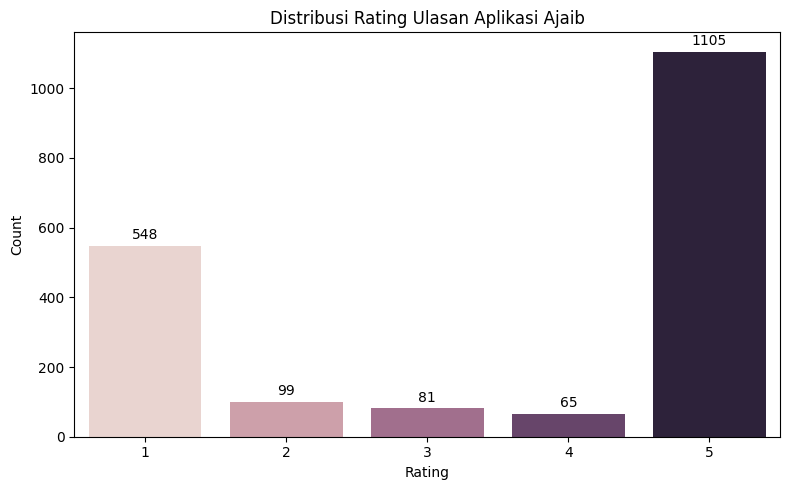

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Perhitungan Statistik ---

# 1. Hitung Total Ulasan
total_ulasan = len(df)

# 2. Hitung Jumlah Ulasan per Rating
rating_counts = df['Rating'].value_counts().sort_index(ascending=False) # Menghitung dan mengurutkan dari Rating 5 ke 1

# --- Menampilkan Statistik (Text Output) ---
print(f"Total Ulasan: {total_ulasan} reviews")
print("-" * 30)

print("Jumlah Ulasan Berdasarkan Rating:")
for rating, count in rating_counts.items():
    print(f"  Rating {rating}: {count} reviews")

print("-" * 30)

# --- Visualisasi (Countplot) ---
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Rating', data=df, hue='Rating', legend=False)

# Tambahkan anotasi (angka) di atas bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x = p.get_x() + p.get_width() / 2.,
        y = height + 20,
        s = f'{height:.0f}',
        ha = 'center'
    )

plt.title('Distribusi Rating Ulasan Aplikasi Ajaib')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# ***WordCloud setelah Preprocessing***

---

In [57]:
from wordcloud import WordCloud

In [58]:
df_negative = df[ (df['Rating']==1.0) | (df['Rating']==2.0) | (df['Rating']==3.0)]
df_positive = df[ (df['Rating']==4.0) | (df['Rating']==5.0)]
#convert to list
negative_list=df_negative['Stemming Data'].tolist()
positive_list= df_positive['Stemming Data'].tolist()

filtered_negative = ("").join(str(negative_list)) #convert the list into a string of spam
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list)) #convert the list into a string of ham
filtered_positive = filtered_positive.lower()

## ***Word Cloud: Positive Reviews***

---

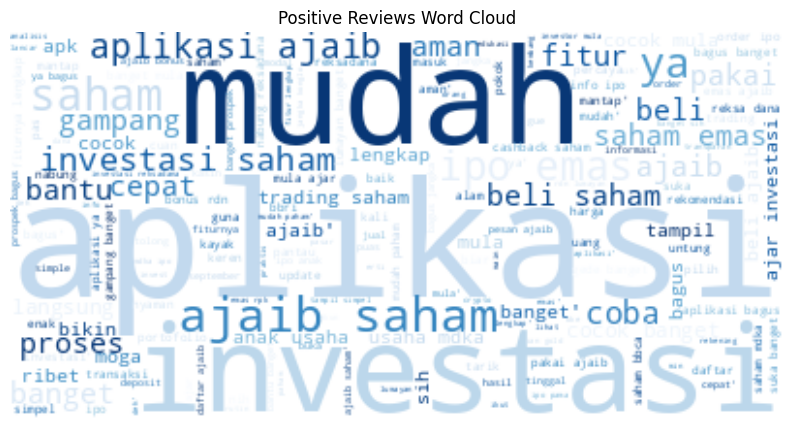

In [60]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Blues").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Reviews Word Cloud")
plt.show()

## ***Word Cloud: Negative Reviews***

---

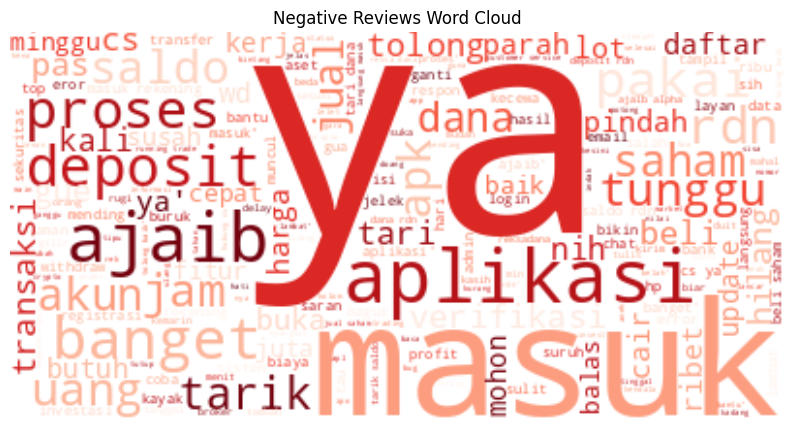

In [61]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews Word Cloud")
plt.show()

# ***Frequency of review text***

---

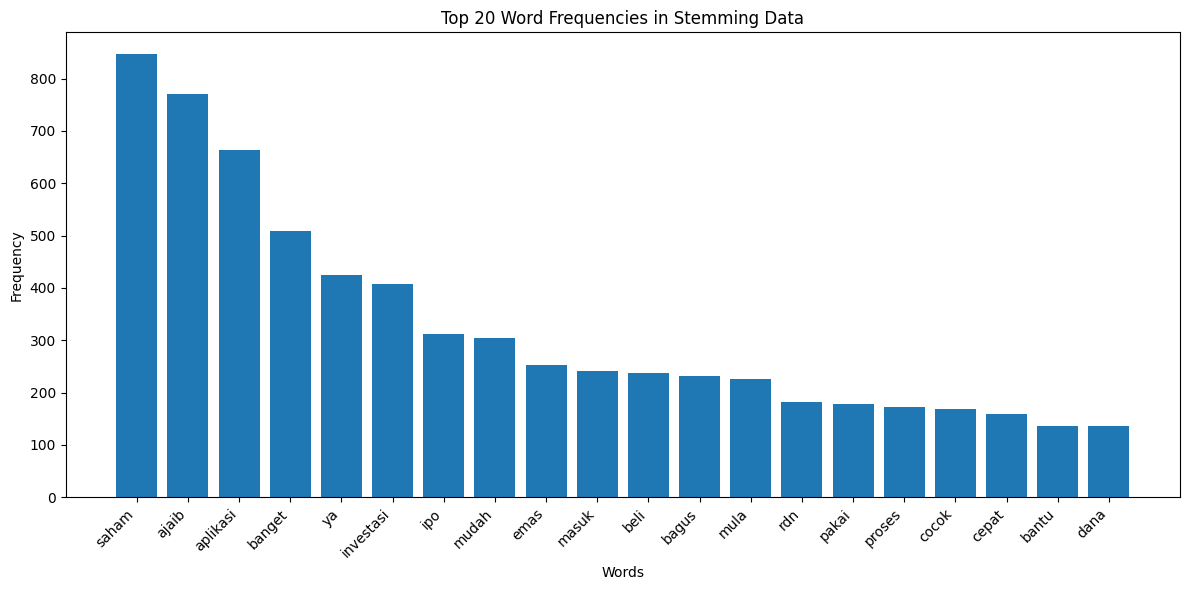

In [62]:
import matplotlib.pyplot as plt
from collections import Counter

def visualize_word_frequency(df, text_column, n=20):
    """
    Visualizes the frequency of the most common words in a text column of a DataFrame.

    (df, 'Stemming Data', n=20)

    Args:
        df (pd.DataFrame): The input DataFrame.
        text_column (str): The name of the column containing the preprocessed text (as a single string).
        n (int): The number of top words to display.
    """
    # Combine all text into a single string
    all_text = ' '.join(df[text_column].astype(str).tolist())

    # Tokenize the text (split into words)
    words = all_text.split()

    # Count word frequencies
    word_counts = Counter(words)

    # Get most common words
    most_common_words = word_counts.most_common(n)

    if not most_common_words:
        print("No words to display frequency for.")
        return

    words, counts = zip(*most_common_words)

    # Create Bar Chart
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f'Top {n} Word Frequencies in {text_column}')
    plt.tight_layout()
    plt.show()

visualize_word_frequency(df, 'Stemming Data', n=20)

# ***Labeling Data***

---

In [100]:
def label_from_rating(rating):
    if rating >= 4:
        return 'Positif'
    elif rating <= 3:
        return 'Negatif'

# Terapkan fungsi ini pada kolom Rating
df['Sentiment_Rating_Label'] = df['Rating'].apply(label_from_rating)

print("\nDistribusi Label Hasil Rating:")
print(df['Sentiment_Rating_Label'].value_counts())


Distribusi Label Hasil Rating:
Sentiment_Rating_Label
Positif    1170
Negatif     728
Name: count, dtype: int64


In [101]:
df.head(10)

,Date,Username,Rating,Review Text,Cleaned Review Text,Normalized Review Text,tokenize,Stopword Removal,Stemming Data,Sentiment_Rating_Label
0,2025-11-03 08:44:09,Ruuhul Maani,1,"sering gangguan, banyak bug, sudah pasang stop...",sering gangguan banyak bug sudah pasang stop l...,sering gangguan banyak bug sudah pasang stop l...,"[sering, gangguan, banyak, bug, sudah, pasang,...","[gangguan, bug, pasang, stop, loss, kejual, sa...",ganggu bug pasang stop loss jual saham,Negatif
1,2025-11-03 08:08:00,Nur Bay,5,min tolong adain fitur trailing stop 🙏,min tolong adain fitur trailing stop,min tolong mengadakan fitur trailing stop,"[min, tolong, mengadakan, fitur, trailing, stop]","[min, tolong, mengadakan, fitur, trailing, stop]",min tolong ada fitur trailing stop,Positif
2,2025-11-03 07:29:10,Syeikhul Mujib,1,proses deposit & penarikannya terlalu lamaaaa,proses deposit penarikannya terlalu lamaaaa,proses deposit penarikannya terlalu lamaaaa,"[proses, deposit, penarikannya, terlalu, lamaaaa]","[proses, deposit, penarikannya, lamaaaa]",proses deposit tari lamaaaa,Negatif
3,2025-11-02 23:15:17,Ahmad badawi Encep,1,sial banget aku order s&p.. padahal pake marke...,sial banget aku order sp padahal pake market o...,sial banget aku order sapa padahal pakai marke...,"[sial, banget, aku, order, sapa, padahal, paka...","[sial, banget, order, sapa, pakai, market, ord...",sial banget order sapa pakai market order jam ...,Negatif
4,2025-11-02 23:08:11,Dendi Hendarmin,3,lama ya verifikasinya padahal udah sy setor 10...,lama ya verifikasinya padahal udah sy setor rb...,lama ya verifikasinya padahal sudah saya setor...,"[lama, ya, verifikasinya, padahal, sudah, saya...","[ya, verifikasinya, setor, ribu, masuk, tuh, ya]",ya verifikasi setor ribu masuk tuh ya,Negatif
5,2025-11-02 21:23:43,ili suhili,1,belum terverifikasi dh nunggu 7 Minggu,belum terverifikasi dh nunggu minggu,belum terverifikasi dah menunggu minggu,"[belum, terverifikasi, dah, menunggu, minggu]","[terverifikasi, dah, menunggu, minggu]",verifikasi dah tunggu minggu,Negatif
6,2025-11-02 16:09:58,Kaka Im,1,maaf banget .awalnya saya mau pake sekutitas a...,maaf banget awalnya saya mau pake sekutitas aj...,maaf banget awalnya saya mau pakai sekutitas a...,"[maaf, banget, awalnya, saya, mau, pakai, seku...","[maaf, banget, pakai, sekutitas, ajaib, daftar...",maaf banget pakai sekutitas ajaib daftar oke o...,Negatif
7,2025-11-02 10:56:13,Wijayanti Dwi,5,"Tampilan ui aplikasi nyaman dipandang,dan bany...",tampilan ui aplikasi nyaman dipandangdan banya...,tampilan ui aplikasi nyaman dipandangdan banya...,"[tampilan, ui, aplikasi, nyaman, dipandangdan,...","[tampilan, ui, aplikasi, nyaman, dipandangdan,...",tampil ui aplikasi nyaman dipandangdan fiturny...,Positif
8,2025-11-02 07:30:39,Tamora,5,simpel,simpel,simpel,[simpel],[simpel],simpel,Positif
9,2025-11-02 02:45:09,Muhammad Iqbal,3,"saya kurangin bintang nya, karena customer ser...",saya kurangin bintang nya karena customer serv...,saya kurangi bintang ya karena customer servic...,"[saya, kurangi, bintang, ya, karena, customer,...","[kurangi, bintang, ya, customer, service, emai...",kurang bintang ya customer service email ya ba...,Negatif


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1898 entries, 0 to 1998
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date                    1898 non-null   object
 1   Username                1898 non-null   object
 2   Rating                  1898 non-null   int64 
 3   Review Text             1898 non-null   object
 4   Cleaned Review Text     1898 non-null   object
 5   Normalized Review Text  1898 non-null   object
 6   tokenize                1898 non-null   object
 7   Stopword Removal        1898 non-null   object
 8   Stemming Data           1898 non-null   object
 9   Sentiment_Rating_Label  1898 non-null   object
dtypes: int64(1), object(9)
memory usage: 227.6+ KB


In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'Stemming Data' is the column with preprocessed text
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Stemming Data'])

print("TF-IDF Matrix Shape:", tfidf_matrix.shape)

TF-IDF Matrix Shape: (1898, 2618)


In [104]:
from sklearn.model_selection import train_test_split

# Assuming 'tfidf_matrix' is your features and 'Sentiment_Rating_Label' is your target variable
X_train, X_test, y_train, y_test = train_test_split(
    tfidf_matrix,
    df['Sentiment_Rating_Label'],
    test_size=0.2, # You can adjust the test set size (e.g., 0.2 for 20%)
    random_state=42, # Set a random state for reproducibility
    stratify=df['Sentiment_Rating_Label'] # Stratify to maintain the proportion of classes
)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1518, 2618)
Shape of X_test: (380, 2618)
Shape of y_train: (1518,)
Shape of y_test: (380,)


## ***Algoritma : Multinomial Naive Bayes***

In [105]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

              precision    recall  f1-score   support

     Negatif       0.88      0.77      0.82       146
     Positif       0.87      0.94      0.90       234

    accuracy                           0.87       380
   macro avg       0.88      0.85      0.86       380
weighted avg       0.87      0.87      0.87       380



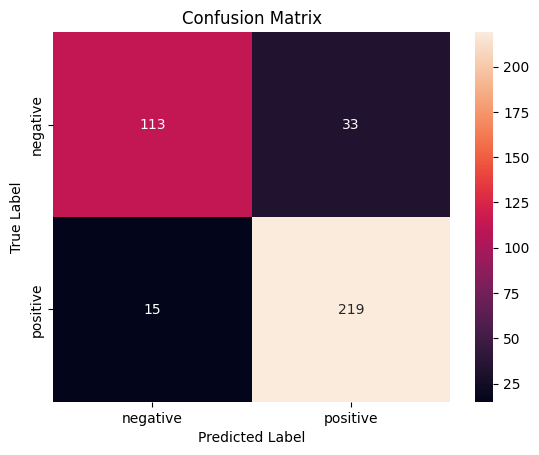

In [107]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
naive_bayes_pred = classifier.predict(X_test)

# Classification Report
print(classification_report(y_test, naive_bayes_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## **Algoritma: Random Forest Classifier**

              precision    recall  f1-score   support

     Negatif       0.91      0.79      0.85       146
     Positif       0.88      0.95      0.91       234

    accuracy                           0.89       380
   macro avg       0.90      0.87      0.88       380
weighted avg       0.89      0.89      0.89       380



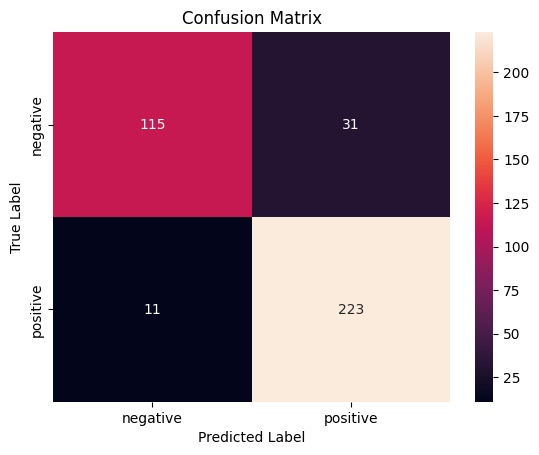

In [108]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=150)
classifier.fit(X_train, y_train)
random_forest_pred = classifier.predict(X_test)

# Classification report
print(classification_report(y_test, random_forest_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, random_forest_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## ***Algoritma: Logistic Regression***

              precision    recall  f1-score   support

     Negatif       0.91      0.85      0.88       146
     Positif       0.91      0.94      0.93       234

    accuracy                           0.91       380
   macro avg       0.91      0.90      0.90       380
weighted avg       0.91      0.91      0.91       380



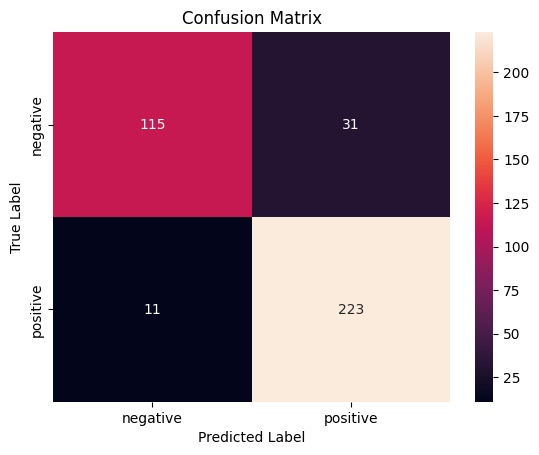

In [109]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
log_reg_pred = classifier.predict(X_test)
# Classification report
print(classification_report(y_test, log_reg_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, random_forest_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## ***Algoritma: Support Vector Machine (SVM)***

              precision    recall  f1-score   support

     Negatif       0.90      0.88      0.89       146
     Positif       0.92      0.94      0.93       234

    accuracy                           0.92       380
   macro avg       0.91      0.91      0.91       380
weighted avg       0.92      0.92      0.92       380



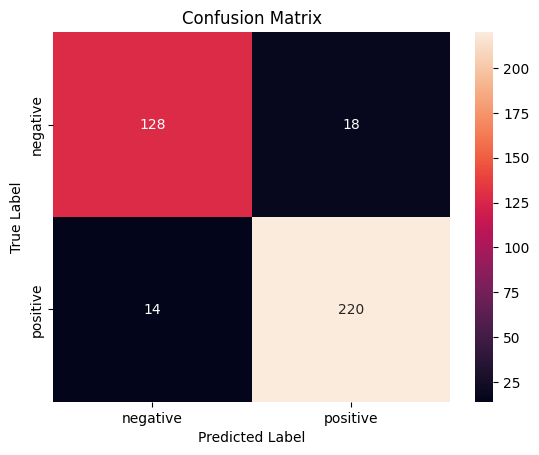

In [110]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
svm_pred = classifier.predict(X_test)
# Classification report
print(classification_report(y_test, svm_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## ***Algoritma: K-Nearest Neighbor (KNN)***

              precision    recall  f1-score   support

     Negatif       0.89      0.05      0.10       146
     Positif       0.63      1.00      0.77       234

    accuracy                           0.63       380
   macro avg       0.76      0.53      0.44       380
weighted avg       0.73      0.63      0.51       380



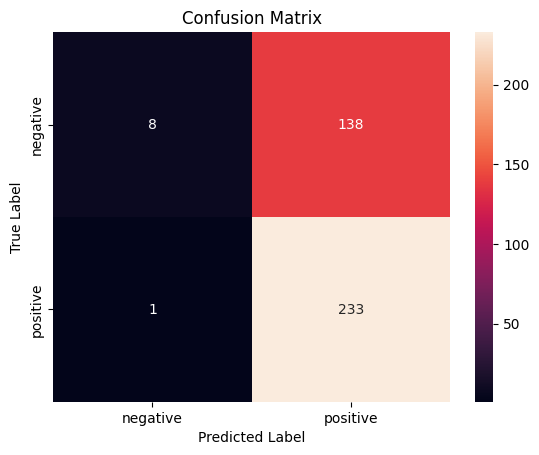

In [111]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)
knn_pred = classifier.predict(X_test)

# Classification report
print(classification_report(y_test, knn_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, knn_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## ***Algoritma: Extra Trees Classifier***

              precision    recall  f1-score   support

     Negatif       0.91      0.80      0.85       146
     Positif       0.88      0.95      0.92       234

    accuracy                           0.89       380
   macro avg       0.90      0.88      0.88       380
weighted avg       0.89      0.89      0.89       380



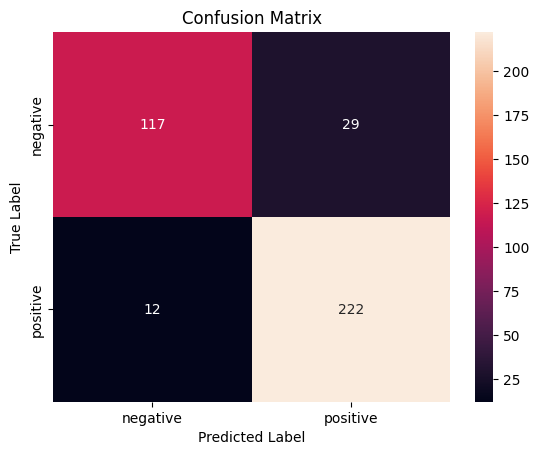

In [112]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier(n_estimators=150, random_state=50)
classifier.fit(X_train, y_train)
extra_trees_pred = classifier.predict(X_test)

# Classification report
print(classification_report(y_test, extra_trees_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, extra_trees_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Performing K-Fold Cross Validation

In [116]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

models = [
          MultinomialNB(),
          LogisticRegression(),
          RandomForestClassifier(n_estimators = 150),
          SVC(kernel = 'linear'),
          KNeighborsClassifier(n_neighbors = 5),
          ExtraTreesClassifier(n_estimators=150, random_state=50)
         ]
names = ["Naive Bayes", "Logistic Regression", "Random Forest", "SVM", "KNN", "Extra Trees"]

# Define scorers with pos_label
precision_scorer = make_scorer(precision_score, pos_label='Positif')
recall_scorer = make_scorer(recall_score, pos_label='Positif')
f1_scorer = make_scorer(f1_score, pos_label='Positif')

scoring = {
    'accuracy': 'accuracy',
    'precision': precision_scorer,
    'recall': recall_scorer,
    'f1': f1_scorer
}

for model, name in zip(models, names):
    print(name)
    for score_name, scorer in scoring.items():
        cv_score = cross_val_score(model, X_train, y_train, scoring=scorer, cv=10).mean()
        print(f" {score_name} - {cv_score} ")
    print()

Naive Bayes
 accuracy - 0.8676237364935517 
 precision - 0.8711659425735994 
 recall - 0.9230382063601006 
 f1 - 0.8959993881707737 

Logistic Regression
 accuracy - 0.8689177413733008 
 precision - 0.8843403263332613 
 recall - 0.9058567833447724 
 f1 - 0.8946856146041334 

Random Forest
 accuracy - 0.8438915998605786 
 precision - 0.8461284086817331 
 recall - 0.9251315488446579 
 f1 - 0.8840227412596494 

SVM
 accuracy - 0.8754966887417218 
 precision - 0.9012417041998934 
 recall - 0.8973003889270188 
 f1 - 0.8986840586067079 

KNN
 accuracy - 0.6284681073544789 
 precision - 0.6250280775661003 
 recall - 0.9935827041866852 
 f1 - 0.767333139874731 

Extra Trees
 accuracy - 0.8550758103868944 
 precision - 0.863044761122541 
 recall - 0.9101692976435599 
 f1 - 0.8855878641247719 



Support Vector Machine (SVM) adalah model terbaik karena memiliki F1-Score cross-validation tertinggi (0.8987), menunjukkan kinerja yang paling seimbang dan stabil.

# ***Predictions***

In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd

# Asumsi: df sudah dimuat dan kolom 'Sentiment_Rating_Label' sudah dimapping ke Positif/Negatif (tanpa Netral)
# Pastikan Anda hanya memiliki 2 kelas di kolom target:
# df = df[df['Sentiment_Rating_Label'] != 'Netral'] # Jika Anda menghapus baris Netral

# 1. Ekstraksi Fitur TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Stemming Data'])

# 2. Persiapan Data Target
X = tfidf_matrix
y = df['Sentiment_Rating_Label']

# 3. Pembagian Data (Train-Test Split)
# Gunakan data biner yang sudah disiapkan
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y # Stratify agar proporsi Positif/Negatif sama di train/test
)

print(f"Shape of X_train (Features): {X_train.shape}")
print(f"Shape of y_train (Labels): {y_train.shape}")

Shape of X_train (Features): (1518, 2618)
Shape of y_train (Labels): (1518,)



--- Kinerja Model Support Vector Machine (SVM) ---
              precision    recall  f1-score   support

     Negatif       0.90      0.88      0.89       146
     Positif       0.92      0.94      0.93       234

    accuracy                           0.92       380
   macro avg       0.91      0.91      0.91       380
weighted avg       0.92      0.92      0.92       380



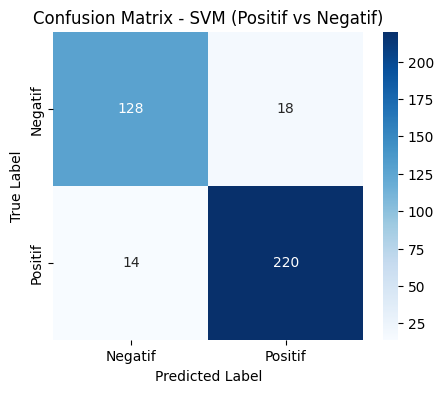

In [119]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

target_names = ['Negatif', 'Positif']

# A. Inisialisasi dan Latih Model SVM
# Menggunakan kernel='linear' karena ini biasanya efektif untuk fitur teks (TF-IDF)
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

# B. Prediksi pada Data Uji
svm_pred = svm_classifier.predict(X_test)

# C. Classification Report (Kinerja Kuantitatif)
print("\n--- Kinerja Model Support Vector Machine (SVM) ---")
# Gunakan 'Positif' sebagai pos_label karena ini adalah klasifikasi biner
print(classification_report(
    y_test,
    svm_pred,
    labels=target_names,       # Mengatasi error 'pos_label'
    target_names=target_names, # Memberi nama pada baris output
    zero_division=0            # Menetapkan 0.00 jika terjadi pembagian nol (misal, tidak ada prediksi Netral)
))


# D. Visualisasi Confusion Matrix (Kinerja Kualitatif)
# Definisikan 2 kelas untuk klasifikasi biner
class_labels = sorted(y_test.unique())

cm = confusion_matrix(y_test, svm_pred)
df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)

plt.figure(figsize=(5, 4))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM (Positif vs Negatif)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()